### 【問題1】仮定関数
### 【問題2】最急降下法
### 【問題3】推定
### 【問題4】目的関数

In [163]:
import numpy as np
np.set_printoptions(suppress=True)

class ScratchLogisticClassifier:
    def __init__(self, iter_num, lr, lam=0.1):
        self.iter_num = iter_num
        self.lr = lr
        self.loss = np.array([])       # lossはイテレーション数だけ作られる
        self.loss_valid = np.array([]) # lossはイテレーション数だけ作られる
        self.theta = None              # シータはfitまでわからない
        self.lam = lam

    def fit(self, X, y, X_valid=None, y_valid=None):
        n_iteration = self.iter_num
        self.theta = np.zeros(X.shape[1]+1) # +1はバイアス分
        dummy_bias = np.ones((X.shape[0], 1))
        X = np.hstack((dummy_bias, X))
        if X_valid is not None:
            dummy_bias = np.ones((X_valid.shape[0], 1))
            X_valid = np.hstack((dummy_bias, X_valid))

        for _ in range(n_iteration):
            y_hat = self._hypothesis(X) # 予測値
            loss = self._gradient_descent(X, y, y_hat)
            self.loss = np.append(self.loss, loss)
            if X_valid is not None:
                # diff_list_valid = (X_valid @ self.theta) - y_valid
                loss_valid = self._loss(X_valid, y_valid)
                self.loss_valid = np.append(self.loss_valid, loss_valid)

    # 線形回帰の仮定関数をシグモイド関数に通す
    def _hypothesis(self, X):
        linear_hypo = X @ self.theta
        return 1 / (1 + np.exp(-linear_hypo)) # exp = 指数関数

    def _gradient_descent(self, X, y, y_hat_list):
        diff_list = y_hat_list - y
        gra = diff_list @ X / len(X)
        # TODO 正則化がうまく機能していない
        l2 =  self.lam * self.theta / len(X) # 正則化項
        self.theta[1:] = self.theta[1:] - self.lr * (gra[1:] + l2[1:])
        self.theta[0] = self.theta[0] - self.lr * gra[0]
        return self._loss(X, y)

    def predict_proba(self, X):
        dummy_bias = np.ones((X.shape[0],1))
        X = np.hstack((dummy_bias, X))
        return self._hypothesis(X)

    def predict(self, X):
        pred_proba = self.predict_proba(X)
        return np.where(pred_proba < 0.5, 0, 1)

    # 平均二乗誤差の計算
    def _mse(self, diff, X):
        return np.sum(diff**2) / X.shape[0]

    # 損失関数(誤差関数、目的関数)
    def _loss(self, X, y):
        y_hat = self._hypothesis(X)
        x_len = X.shape[0]
        crossentropy =  -np.sum(y * np.log(y_hat) + (1-y) * np.log(1-y_hat)) / x_len
        l2_decay = np.sum(self.theta[1:]**2)/(2 * x_len)
        return crossentropy + l2_decay

###【問題5】学習と推定
###【問題6】学習曲線のプロット

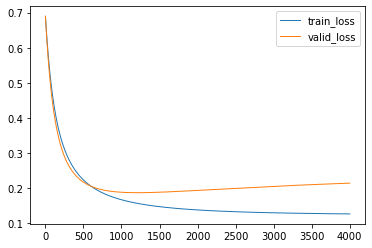

[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0]
[0.06448029 0.99493718 0.02605338 0.97358671 0.98999836 0.61607379
 0.06245125 0.9889996  0.99211545 0.95485373 0.9183902  0.9433032
 0.9819805  0.01084817 0.05417187 0.05043075 0.01329464 0.08471537
 0.08367785 0.02130977 0.06448029 0.95573704 0.0328873  0.96093452
 0.03537548]
[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0]


1.0

In [193]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

iris_dataset = load_iris()
x = pd.DataFrame(iris_dataset.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
x = x.loc[:, ["sepal_length", "petal_length"]]
y = pd.Series(iris_dataset.target, name="y")
df_train = x.join(y).query('y in (0,1)')
x = df_train.drop(["y"],  axis=1)
y = df_train["y"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=True, random_state=0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

slc = ScratchLogisticClassifier(4000, 0.01, 1) # 正則化がうまく決まるパターン
# slc = ScratchLogisticClassifier(10000, 0.01, 0.1)
slc.fit(x_train, y_train, x_test, y_test)

import matplotlib.pyplot as plt
plt.plot(np.arange(1, len(slc.loss)+1), slc.loss, label='train_loss', linewidth=1)
plt.plot(np.arange(1, len(slc.loss_valid)+1), slc.loss_valid, label='valid_loss', linewidth=1)
plt.legend()
plt.show()

y_pred_proba = slc.predict_proba(x_test)
y_pred = slc.predict(x_test)
print(y_test.values)
print(y_pred_proba)
print(y_pred)
accuracy_score(y_test, y_pred)


### 【問題7】決定領域の可視化


<class 'numpy.ndarray'>
[5.3 4.6 5.7 5.8 6.8 5.  5.5 5.5 6.2 6.4 5.2 5.7 6.3 6.1 6.4 4.9 5.9 4.4
 4.5 5.  5.7 5.1 5.  4.4 5.4 6.1 5.2 5.1 4.9 5.2 7.  4.8 5.  5.1 6.9 5.4
 5.4 5.6 4.9 5.7 6.  5.2 5.4 5.8 5.5 5.1 4.7 5.  6.2 5.1 5.6 5.4 5.6 6.3
 6.7 5.  4.9 5.5 5.1 5.1 6.7 6.6 4.8 5.6 5.9 6.3 5.5 5.1 6.  4.9 5.7 5.8
 5.6 4.6 5.1]
[5.3 4.6 5.7 5.8 6.8 5.  5.5 5.5 6.2 6.4 5.2 5.7 6.3 6.1 6.4 4.9 5.9 4.4
 4.5 5.  5.7 5.1 5.  4.4 5.4 6.1 5.2 5.1 4.9 5.2 7.  4.8 5.  5.1 6.9 5.4
 5.4 5.6 4.9 5.7 6.  5.2 5.4 5.8 5.5 5.1 4.7 5.  6.2 5.1 5.6 5.4 5.6 6.3
 6.7 5.  4.9 5.5 5.1 5.1 6.7 6.6 4.8 5.6 5.9 6.3 5.5 5.1 6.  4.9 5.7 5.8
 5.6 4.6 5.1]


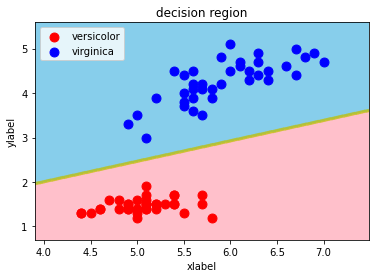

In [165]:
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    print(type(X))
    print(X[:,0])
    print(X[:,0])
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()


iris_dataset = load_iris()
x = pd.DataFrame(iris_dataset.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
x = x.loc[:, ["sepal_length", "petal_length"]]
y = pd.Series(iris_dataset.target, name="y")
df_train = x.join(y).query('y in (0,1)')
x = df_train.drop(["y"],  axis=1)
y = df_train["y"]

slc = ScratchLogisticClassifier(100, 0.05, lam=0.1)
slc.fit(x_train, y_train)

decision_region(x_train.values, y_train.values, slc)


In [109]:
hoge = np.array([1,2,3,4,5])
print(hoge)
print(hoge[:-1])
print(hoge[1:])

[1 2 3 4 5]
[1 2 3 4]
[2 3 4 5]
